# House Price Prediction Using Advance Regression Techniques

## 1. Problem Definition:
Predicts the price of a residential home, given the important aspects of that house. 

## 2. Data:
Orignal data set came from kaggle "House Price Prediction Competition". This dataset was compiled by Dean De Cock for use in data science education. 
Dataset can be found here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## 3. Evaluation:
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.
    Since it's a regression problem so we have to minimize the error(Log-Root-Mean-Squared-error).
    
## 4 Features:
Data contains about 79 features (variables) that can be used to predict a house price.
Detailed description of each data feature can be found here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

### Getting our tools ready:

In [5]:
## regular EDA & plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## to view our plots inside notebook
%matplotlib inline

## modeling,evaluation and tunning
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split

### Loading Data:

In [6]:
df=pd.read_csv("data/house-prices-advanced-regression-techniques/train.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

We have seen that our data set as a lot of missing values as well as non-numerical values. So, we have to do some encoding and imputing.

#### Let's do some EDA.

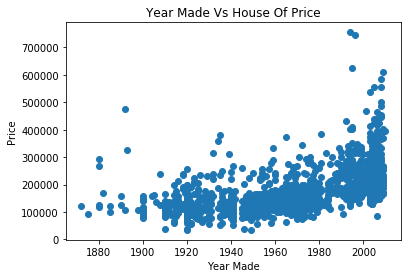

In [9]:
plt.scatter(df["YearBuilt"],df["SalePrice"]);
plt.xlabel("Year Made");
plt.ylabel("Price");
plt.title("Year Made Vs House Of Price");

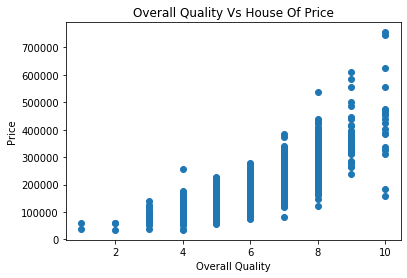

In [10]:
plt.scatter(df["OverallQual"],df["SalePrice"]);
plt.xlabel("Overall Quality");
plt.ylabel("Price");
plt.title("Overall Quality Vs House Of Price");

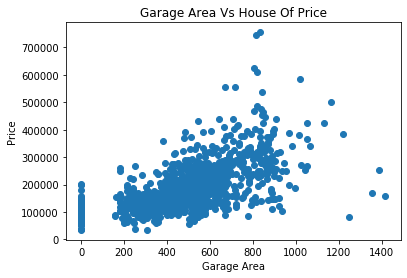

In [11]:

plt.scatter(df["GarageArea"],df["SalePrice"]);
plt.xlabel("Garage Area");
plt.ylabel("Price");
plt.title("Garage Area Vs House Of Price");

### 5. Modeling:
#####  Let's prepare for modeling now. For that we need to fill missing values and convert non numerical values into numerical.

##### Converting non numerical values to categories:
Let's make a function so we can use it again and again when needed.





In [12]:
def encoding(df):
    for labels,content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[labels]=content.astype("category").cat.as_ordered()

In [13]:
encoding(df=df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

##### Fill missing values:
We can also make a function here to enbable reusability.





























In [15]:
##filling missing numerical values
def numerical_imputer(df):
    for labels,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                ## adding a binary column to keep record of missing values
                df[labels+" is_missing"]=pd.isnull(content)
                ## fill missing with median
                df[labels]=content.fillna(content.median())
       

In [16]:
numerical_imputer(df)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Id                      1460 non-null   int64   
 1   MSSubClass              1460 non-null   int64   
 2   MSZoning                1460 non-null   category
 3   LotFrontage             1460 non-null   float64 
 4   LotArea                 1460 non-null   int64   
 5   Street                  1460 non-null   category
 6   Alley                   91 non-null     category
 7   LotShape                1460 non-null   category
 8   LandContour             1460 non-null   category
 9   Utilities               1460 non-null   category
 10  LotConfig               1460 non-null   category
 11  LandSlope               1460 non-null   category
 12  Neighborhood            1460 non-null   category
 13  Condition1              1460 non-null   category
 14  Condition2              

In [17]:
# filling missing non numerical values
def non_numeric_encoder(df):
    for labels,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #making binary column
                df[labels+" is_missing"]=pd.isnull(content)
            df[labels]=pd.Categorical(content).codes+1

In [18]:
non_numeric_encoder(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 100 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   MSSubClass               1460 non-null   int64  
 2   MSZoning                 1460 non-null   int8   
 3   LotFrontage              1460 non-null   float64
 4   LotArea                  1460 non-null   int64  
 5   Street                   1460 non-null   int8   
 6   Alley                    1460 non-null   int8   
 7   LotShape                 1460 non-null   int8   
 8   LandContour              1460 non-null   int8   
 9   Utilities                1460 non-null   int8   
 10  LotConfig                1460 non-null   int8   
 11  LandSlope                1460 non-null   int8   
 12  Neighborhood             1460 non-null   int8   
 13  Condition1               1460 non-null   int8   
 14  Condition2             

As kaggle data set does not come with validation set so we can make our own.

In [20]:
X=df.drop("SalePrice",axis=1)
y=df.SalePrice

In [21]:
X_train,X_val,y_train,y_val=train_test_split(X,
                                            y,
                                            random_state=42,
                                            test_size=0.2)

Its the time to fit model and make evaluations of validation set.

In [23]:
np.random.seed(42)
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

We can define an evaluation function that fullfil our evaluation criteria.
Let's do it.

In [24]:
def model_evaluation(model,X_val,y_val):
    y_preds=model.predict(X_val)
    msle=mean_squared_log_error(y_val,y_preds)
    RMSLE=np.sqrt(msle)
    score=model.score(X_val,y_val)
    evaluation={"Accuracy":round(score*100,2),
               "RMSLE":round(RMSLE,2)}
    return evaluation

In [25]:
model_evaluation(rfr,X_val,y_val)

{'Accuracy': 89.04, 'RMSLE': 0.15}

### 6. Model Tunning:
As we have done initial modeling but now it's the time for doing experiments will hyperparameters tuning to improve our model. 

In [26]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [None,100,200],
    'max_features': ["auto",40,50,100],
    'min_samples_leaf': [1,3,30],
    'min_samples_split': [2,10,30],
    'n_estimators': [40,50,100]
}

grid_search_rfr=GridSearchCV(RandomForestRegressor(),
                            param_grid=param_grid,
                            n_jobs=-1,
                            verbose=True)
grid_search_rfr.fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1318 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  6.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [173]:
model_evaluation(grid_search_rfr,X_val,y_val)

{'Accuracy': 88.04, 'RMSLE': 0.16}

It's not improving....

In [40]:
param_grid_random ={
 'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [40,100,200]
}
random_search_rfr=RandomizedSearchCV(RandomForestRegressor(),
                                     param_distributions=param_grid_random,
                                     n_iter=10,
                                     verbose=True,
                                     n_jobs=-1)
random_search_rfr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   34.6s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [174]:
model_evaluation(random_search_rfr,X_val,y_val)

{'Accuracy': 88.21, 'RMSLE': 0.16}

**It's really getting worse :(**   
We should try another model. Lets try `GradientBoostingRegressor`

In [34]:
params = {'n_estimators': 5000,
          'max_depth': 4,
          'max_features':80,
          'min_samples_split': 3,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr=GradientBoostingRegressor(**params,random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=80, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=5000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [186]:
model_evaluation(gbr,X_val,y_val)

{'Accuracy': 91.42, 'RMSLE': 0.14}

After a lot of experiments , I have found these best parametres above.  
You can also spend your time in experiments.

### 7. Making predictions on test data; 

In [27]:
X_test=pd.read_csv("data/house-prices-advanced-regression-techniques/test.csv")

In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

We have to do preprocessings on data to make our model be able to do predictions on it.  
It's the time when our encoding and imputing functions come in handy.

In [29]:
encoding(X_test)

In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          107 non-null    category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   in

In [31]:
numerical_imputer(X_test)
non_numeric_encoder(X_test)

In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 113 entries, Id to SaleType is_missing
dtypes: bool(33), float64(11), int64(26), int8(43)
memory usage: 530.2 KB


Our data is ready, let's make predictions on it.

In [35]:
gbr.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 99 and input n_features is 113 

Such a problem occurs when number of features in Training data are not equall to no of features in test data.   
Let's check which columns are to be added and how to add them.

In [36]:
set(X_test)-set(X_train)

{'BsmtFinSF1 is_missing',
 'BsmtFinSF2 is_missing',
 'BsmtFullBath is_missing',
 'BsmtHalfBath is_missing',
 'BsmtUnfSF is_missing',
 'Exterior1st is_missing',
 'Exterior2nd is_missing',
 'Functional is_missing',
 'GarageArea is_missing',
 'GarageCars is_missing',
 'KitchenQual is_missing',
 'MSZoning is_missing',
 'SaleType is_missing',
 'TotalBsmtSF is_missing',
 'Utilities is_missing'}

Above coulmns are missing in Training data. We can add them by assigning value of False.

In [37]:
X_train['BsmtFinSF1 is_missing']=False
X_train['BsmtFinSF2 is_missing']=False
X_train['BsmtFullBath is_missing']=False
X_train['BsmtHalfBath is_missing']=False
X_train['BsmtUnfSF is_missing']=False
X_train['Exterior1st is_missing']=False
X_train['Exterior2nd is_missing']=False
X_train['Functional is_missing']=False
X_train['GarageArea is_missing']=False
X_train['GarageCars is_missing']=False
X_train['KitchenQual is_missing']=False
X_train['MSZoning is_missing']=False
X_train['SaleType is_missing']=False
X_train['TotalBsmtSF is_missing']=False
X_train['Utilities is_missing']=False

/home/hassan/Desktop/House/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/hassan/Desktop/House/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/hassan/Desktop/House/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [38]:
X_val['BsmtFinSF1 is_missing']=False
X_val['BsmtFinSF2 is_missing']=False
X_val['BsmtFullBath is_missing']=False
X_val['BsmtHalfBath is_missing']=False
X_val['BsmtUnfSF is_missing']=False
X_val['Exterior1st is_missing']=False
X_val['Exterior2nd is_missing']=False
X_val['Functional is_missing']=False
X_val['GarageArea is_missing']=False
X_val['GarageCars is_missing']=False
X_val['KitchenQual is_missing']=False
X_val['MSZoning is_missing']=False
X_val['SaleType is_missing']=False
X_val['TotalBsmtSF is_missing']=False
X_val['Utilities is_missing']=False

/home/hassan/Desktop/House/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/hassan/Desktop/House/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/hassan/Desktop/House/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Columns: 114 entries, Id to Utilities is_missing
dtypes: bool(34), float64(3), int64(34), int8(43)
memory usage: 434.6 KB


In [40]:
set(X_train)-set(X_test)

{'Electrical is_missing'}

Above Column is missing in test data so lets do fix it in the same way like training data.

In [42]:
X_test['Electrical is_missing']=False

In [44]:
set(X_train)-set(X_test)

set()

Now we have to fit model again on our transformed data and then we will make predictions.

In [45]:
params = {'n_estimators': 4000,
          'max_depth': 4,
          'max_features':80,
          'min_samples_split': 3,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr=GradientBoostingRegressor(**params,random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=80, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
model_evaluation(gbr,X_val,y_val)

{'Accuracy': 90.93, 'RMSLE': 0.14}

In [47]:
#model predictions
predictions=gbr.predict(X_test)

In [48]:
#saving predictions with their id's in DataFrame
prediction=pd.DataFrame()
prediction["Id"]=X_test["Id"]
prediction["SalePrice"]=predictions

In [49]:
prediction

,Id,SalePrice
0,1461,129719.240859
1,1462,167744.465328
2,1463,184632.162543
3,1464,192474.101363
4,1465,198041.172963
...,...,...
1454,2915,80192.864210
1455,2916,80903.731466
1456,2917,161106.415222
1457,2918,121649.498658


#### Saving the predictions into Csv form 

In [241]:
prediction.to_csv("data/house-prices-advanced-regression-techniques/predictions.csv",index=False)